In [ ]:
#Author and MVP: Sandeep Pawar
#https://fabric.guru/measure-maze-visualizing-measure-dependencies-using-semantic-link-network-analysis

In [1]:
#Install Measure Maze in a Fabric Notebook
!pip install https://github.com/pawarbi/MeasureMaze/raw/main/measuremaze-0.0.1-py3-none-any.whl --q


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 3, Finished, Available, Finished)

In [3]:
#Import Measure Maze
from measuremaze.map import get_dependencies, PlotDependencies

#Specify Premium workspace and dataset id or name
ws = "bf58b874-6e62-4aa2-85fb-d84de7b9b295"
ds = "b7eb6ef0-3c2d-42f3-a9cd-eac976748bfc"

#Returns a FabricDataFrame with dependency mapping for the above dataset
df = get_dependencies(dataset = ds, workspace = ws)
df.head(10)


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 5, Finished, Available, Finished)

,Object Name,Expression,Dependent on,Type,Folder
0,Net Sales,"CALCULATE(SUM(Sales[Amount]),Sales[Status]=""So...",Sales[Status],COLUMN,Analysis DAX\Sales
1,Net Sales,"CALCULATE(SUM(Sales[Amount]),Sales[Status]=""So...",Sales[Amount],COLUMN,Analysis DAX\Sales
2,Product Top N,"SWITCH( TRUE(), ISINSCOPE('Product'[P...",Product[Product],COLUMN,Design DAX\TopN
3,Product Top N,"SWITCH( TRUE(), ISINSCOPE('Product'[P...",Product[Category],COLUMN,Design DAX\TopN
4,Product Top N,"SWITCH( TRUE(), ISINSCOPE('Product'[P...",Product[Segment],COLUMN,Design DAX\TopN
5,Product Top N,"SWITCH( TRUE(), ISINSCOPE('Product'[P...",Net Sales,MEASURE,Design DAX\TopN
6,Product Sales Top 3,"IF([Product Top N]<4,[Net Sales],0)",Net Sales,MEASURE,Design DAX\TopN
7,Product Sales Top 3,"IF([Product Top N]<4,[Net Sales],0)",Product Top N,MEASURE,Design DAX\TopN
8,Product Sales Other,"IF([Product Top N]>3,[Net Sales],0)",Net Sales,MEASURE,Design DAX\TopN
9,Product Sales Other,"IF([Product Top N]>3,[Net Sales],0)",Product Top N,MEASURE,Design DAX\TopN


In [4]:
#You can use this dataframe like any other pandas dataframe and filter/transform as needed. 
#For example, we know that using IF , especially nested IF can cause DAX performance issues which can be optimized by using variables and SWITCH . 
#We can filter the above dataframe to identify all objects that use IF. Using regex patterns can make this very powerful.

df[df['Expression'].str.contains('IF')]

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 6, Finished, Available, Finished)

,Object Name,Expression,Dependent on,Type,Folder
6,Product Sales Top 3,"IF([Product Top N]<4,[Net Sales],0)",Net Sales,MEASURE,Design DAX\TopN
7,Product Sales Top 3,"IF([Product Top N]<4,[Net Sales],0)",Product Top N,MEASURE,Design DAX\TopN
8,Product Sales Other,"IF([Product Top N]>3,[Net Sales],0)",Net Sales,MEASURE,Design DAX\TopN
9,Product Sales Other,"IF([Product Top N]>3,[Net Sales],0)",Product Top N,MEASURE,Design DAX\TopN
16,Store Sales Other,"IF([Store Top N]>3,[Net Sales],0)",Net Sales,MEASURE,<NA>
17,Store Sales Other,"IF([Store Top N]>3,[Net Sales],0)",Store Top N,MEASURE,<NA>
18,Store Sales Top 3,"IF([Store Top N]<4,[Net Sales],0)",Net Sales,MEASURE,Design DAX\TopN
19,Store Sales Top 3,"IF([Store Top N]<4,[Net Sales],0)",Store Top N,MEASURE,Design DAX\TopN
24,Net Sales Indicator,"CONCATENATE(IF([Net Sales Variance %]<=0,"""",""+...",Net Sales Variance %,MEASURE,<NA>
31,Units Sold Indicator,"CONCATENATE(IF([Units Sold Variance %]<=0,"""",""...",Units Sold Variance %,MEASURE,<NA>


In [5]:
#Plot all objects
all_objects = PlotDependencies(df)
all_objects.show()


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 7, Finished, Available, Finished)

,Object,Upstream Dependencies,Downstream Dependencies,Centrality
0,Net Sales,2,16,0.285714
1,Returns,2,11,0.206349
2,Product Top N,4,3,0.111111
3,Units Returned,2,4,0.095238
4,ProductR Top N,4,2,0.095238
5,Returns PM,2,3,0.079365
6,Units Sold,2,3,0.079365
7,WIF Same,4,1,0.079365
8,WIF Adjusted Net Sales,4,1,0.079365
9,% Return Rate Value,2,3,0.079365


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 8, Finished, Available, Finished)

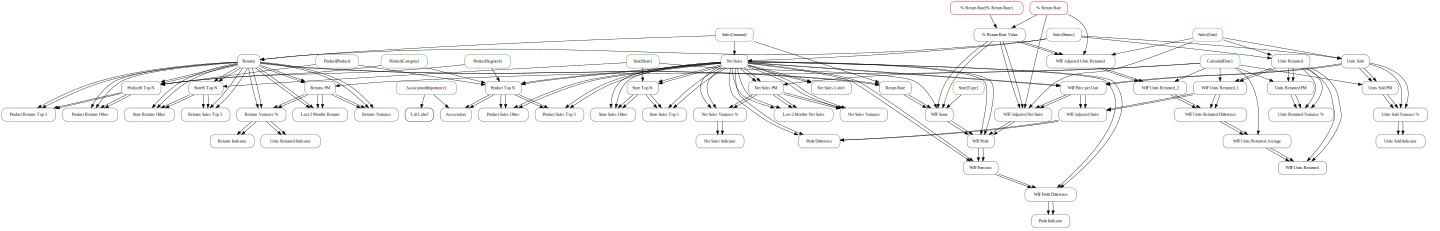

In [6]:
all_objects.plot()

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 9, Finished, Available, Finished)

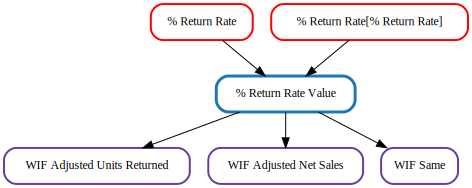

In [7]:
all_objects.plot('% Return Rate Value')

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 10, Finished, Available, Finished)

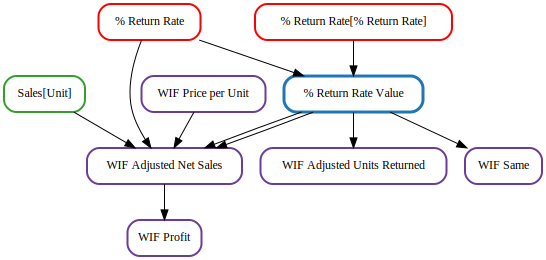

In [8]:
#You can pass a list as well:
all_objects.plot(['WIF Adjusted Net Sales', '% Return Rate Value'])

Nodes (i.e. objects) have colors based on the type of object.

Red: Calculated columns and calculated tables

Green : Regular column

Purple: Measure

Blue : Object under consideration.

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 11, Finished, Available, Finished)

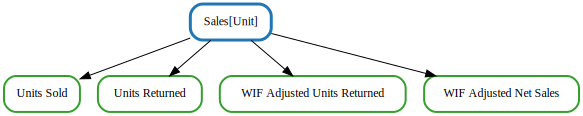

In [9]:
all_objects.plot('Sales[Unit]')
#In this example, Sales[Unit] column is used by four different measures. Sales[Unit] is blue because it's the object being plotted (again the colors are inconsistent and will be fixed later).

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 12, Finished, Available, Finished)

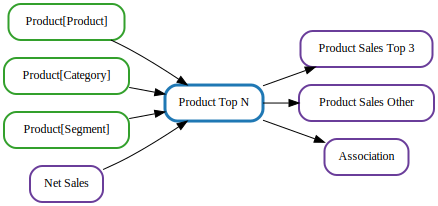

In [10]:
#Change the layout
all_objects.plot('Product Top N', layout='horizontal')

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 13, Finished, Available, Finished)

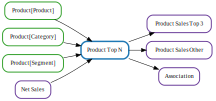

In [11]:
all_objects.plot('Product Top N', graph_size='3,3', layout='horizontal')

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 15, Finished, Available, Finished)

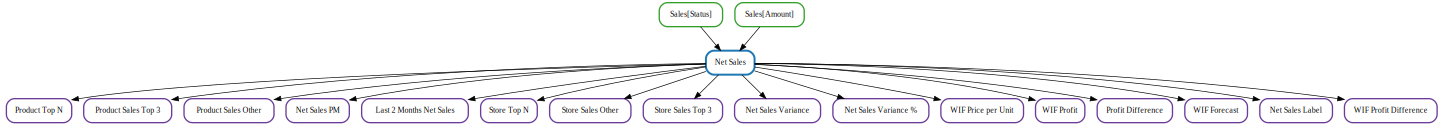

In [13]:
#Return node(s) with highest centrality score (Most connectections/impact)
all_objects.centrality()


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 16, Finished, Available, Finished)

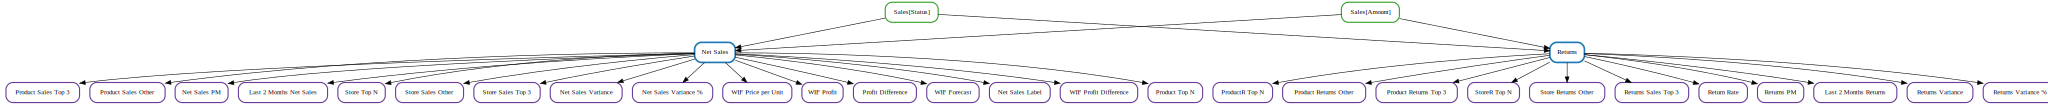

In [14]:
#Return top 2 central nodes
all_objects.centrality(level = 2, graph_size='30,20')


In [15]:
all_objects = PlotDependencies(df)
all_objects.show()

#The table returned by .show() method also shows the centrality score for each object. 
#I would like to point out that the default centrality method does not distinguish between the upstream and downstream dependencies. 
#Below, ProductR Top N and Units Returned both have a total of 6 connections and hence the same centrality score.

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 17, Finished, Available, Finished)

,Object,Upstream Dependencies,Downstream Dependencies,Centrality
0,Net Sales,2,16,0.285714
1,Returns,2,11,0.206349
2,Product Top N,4,3,0.111111
3,Units Returned,2,4,0.095238
4,ProductR Top N,4,2,0.095238
5,Returns PM,2,3,0.079365
6,Units Sold,2,3,0.079365
7,WIF Same,4,1,0.079365
8,WIF Adjusted Net Sales,4,1,0.079365
9,% Return Rate Value,2,3,0.079365


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 18, Finished, Available, Finished)

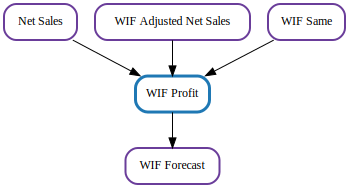

In [17]:
all_objects.centrality(method="closeness")

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 19, Finished, Available, Finished)

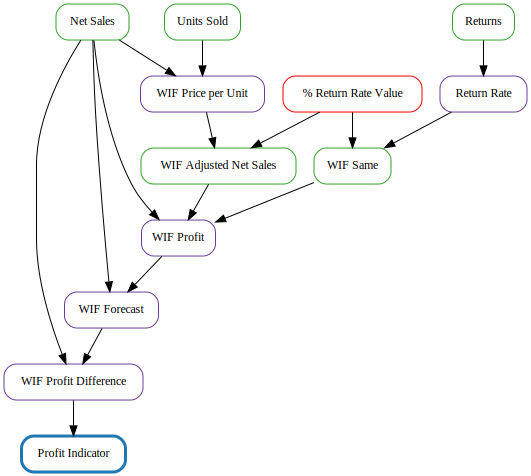

In [18]:
#Returns objects with a long dependency chain
all_objects.depth()


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 20, Finished, Available, Finished)

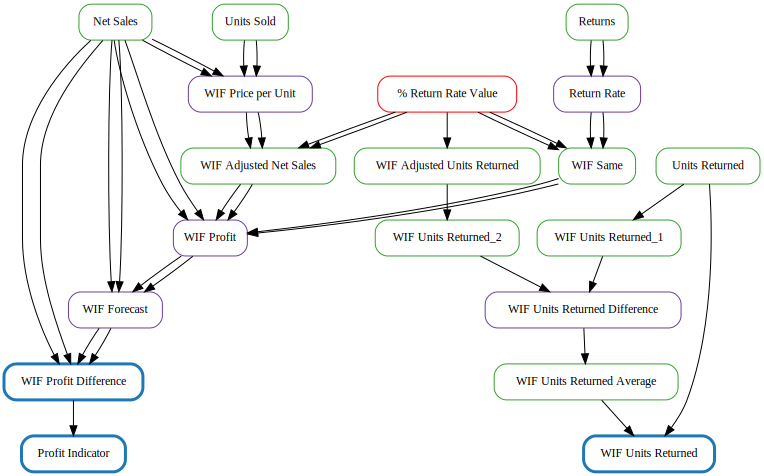

In [19]:
#You can specify a level, similar to centrality, to get more than one object. 
#Below level=3 returned 3 measures (Profit Indicator, WIF Profit Difference, WIF Units Returned) with a long chain of dependencies. 
#You can control the size via graph_size, dpi and layout.

all_objects.depth(level=3)

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 21, Finished, Available, Finished)

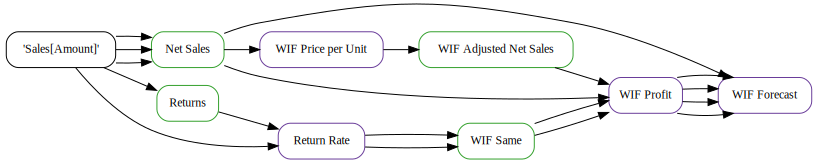

In [20]:
#Lastly, during development, you may want to know if there are any dependencies between two objects. This can be found by using find_link() method.
#You can specify any two objects and if they share dependencies, they are plotted.

all_objects.find_link('Sales[Amount]', 'WIF Forecast')

StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 22, Finished, Available, Finished)

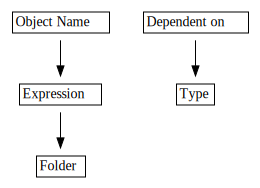

In [21]:
#Semantic-Link also has methods to find functional dependencies between columns in a FabricDataFrame. 
#The difference between the two is, plot_dependencies identifies relationships between columns in a dataframe.

from sempy.dependencies import plot_dependency_metadata

deps = df.find_dependencies()
plot_dependency_metadata(deps)


StatementMeta(, 8bcca61c-29bb-47b5-8e1b-b2dadf235f33, 23, Finished, Available, Finished)

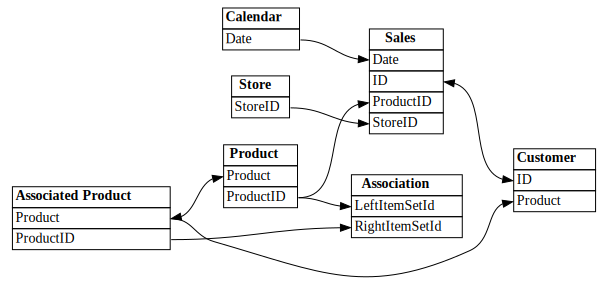

In [22]:
#Semantic Link can also be used to plot relationships between tables.

from sempy import fabric
from sempy.relationships import plot_relationship_metadata


relationships = fabric.list_relationships(workspace=ws, dataset=ds)
plot_relationship_metadata(relationships)
